In [2]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 20.1 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- ------------------------

In [ ]:
# ============================
# 1️⃣ Librerías
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from textblob import TextBlob

sns.set(style="whitegrid")
np.random.seed(42)

In [20]:
# Platos (66 en total)
platos = [
    # Desayunos / tostadas
    'Castizo','Pulled Pork','Trufado','Benedictino','Ibérica','Sobrasada Poché','Pavo Real','Mediterránea','Curada',
    # Desayunos / otros
    'Yogur griego','Huevos a la plancha','Huevos revueltos','Tortilla Francesa',
    # Bebidas
    'Café XL','Capuccino Picón','Matcha Latte','Chai Latte','Café Irlandés','Café Vienés','Carajillo','Café Doble',
    'Café Bombón','Café Trifásico','Café solo/americano/cortado/con leche/Manchada','Infusiones','Cola Cao','Con Leche Vegetal',
    'Zumo de Naranja Natural','Zumos Premium',
    # Restaurante
    'Nuestro Tomate Aliñao','Ensalada de Burrata','Carpaccio de Pepino','Ensaladilla','Paleta Ibérica','Selección de quesos',
    'Foie Mi Cuit','Atún Rojo','Anchoa del Cantábrico','Croquetas de la abuela','Croquetas de fideuá negra','Surtido de croquetas',
    'Bravas','Puerros Confitados','Crujiente de Berenjena','Callos de Bacalao','Cochifrito','Milanesa de cordero','Lasaña',
    'Carrilleras de cerdo ibérico','Codillo al carbón','Rabo de toro','Abanico ibérico','Solomillo de Ternera','Entrecotte','Pulpo',
    'Calamar','Bacalao','Torrija','Tarta Picón','Tarta cremosa de queso','Flan de huevo','Zuccotto de café','Tartufo de pistacho',
    'Fruta de Temporada','Selección de quesos (resto)',
    'Nuevo Plato Extra'   # añadido para completar 66
]

In [21]:
# Categorías alineadas
categorias = ['Desayuno']*13 + ['Bebida']*15 + ['Restaurante']*38  # 13+15+38=66

# Precios alineados
precios = [
    # Desayunos 13
    4.8,5.1,4.5,5.8,5.5,6.0,7.8,5.3,5.3,5.5,4.5,4.5,3.5,
    # Bebidas 15
    2.0,3.5,3.5,3.5,6.0,2.5,2.5,2.0,2.0,2.8,1.7,2.0,2.9,2.9,3.5,
    # Restaurante 38
    13,15.5,12.9,14.5,13,16,12.5,14.5,4.5,12,13,15,10.9,13.5,15.5,23.5,23,22.5,15.5,18.5,23,21,21,24,26.5,24,24.5,21,
    8,6.5,6.5,6.5,7,7,5,16,
    9   # Precio del "Nuevo Plato Extra"
]


In [23]:
precios.append(9)  # Añadir precio del último plato


In [24]:
# Verificación final
assert len(platos) == len(categorias) == len(precios), f"Longitudes: {len(platos)}, {len(categorias)}, {len(precios)}"

C:\Users\beggy\AppData\Local\Temp\ipykernel_32056\1240163756.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'fecha': pd.date_range(start='2025-08-01', periods=500, freq='H'),


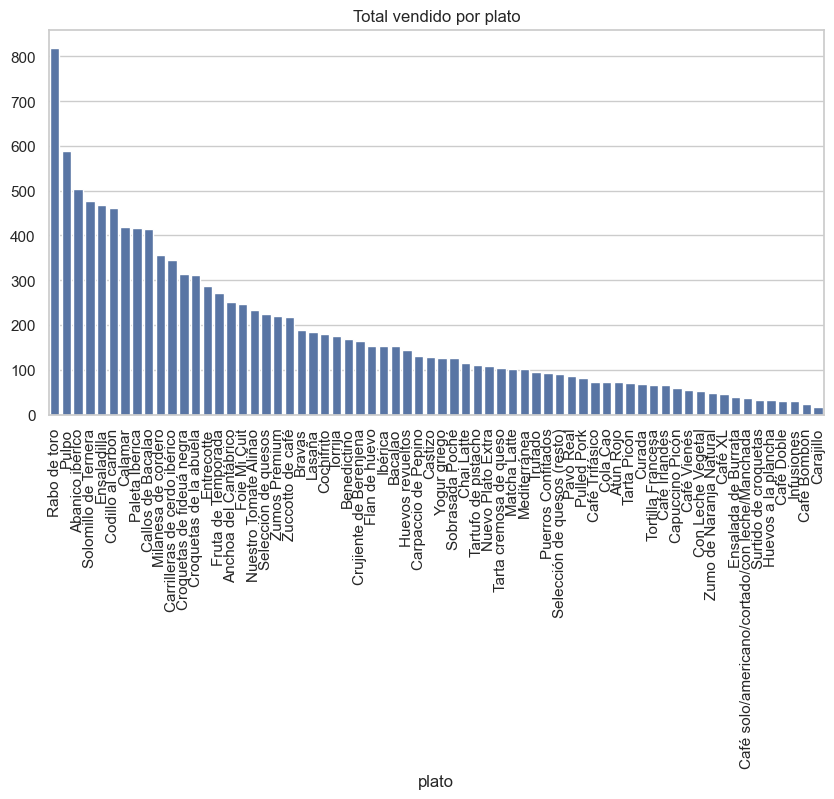

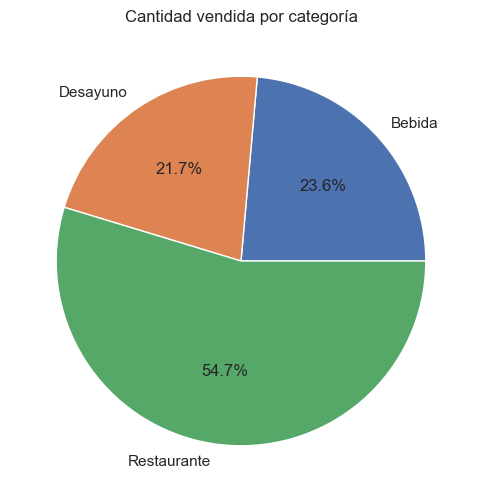

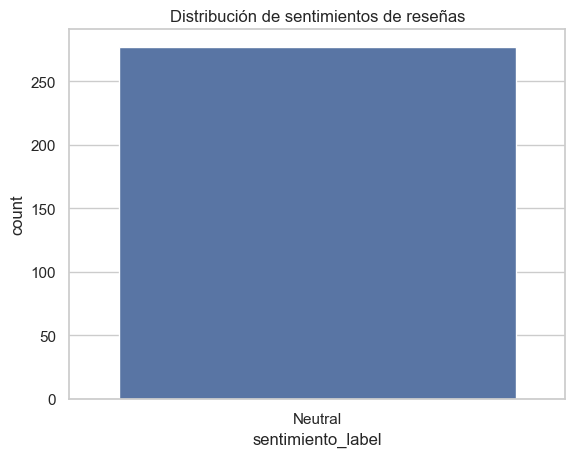

RMSE: 6.87 €


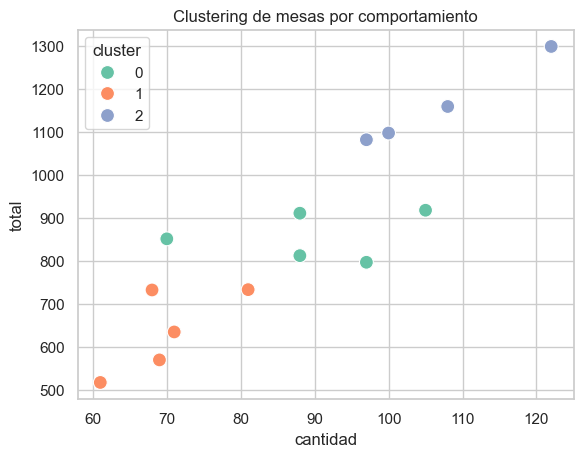

In [25]:
# Crear DataFrame menú
menu = pd.DataFrame({
    'plato': platos,
    'categoria': categorias,
    'precio': precios
})

menu.head()

# ============================
# 3️⃣ Ventas simuladas
# ============================
ventas = pd.DataFrame({
    'fecha': pd.date_range(start='2025-08-01', periods=500, freq='H'),
    'mesa': np.random.randint(1, 15, size=500),
    'plato': np.random.choice(menu['plato'], size=500)
})

ventas = ventas.merge(menu, on='plato')
ventas['cantidad'] = np.random.randint(1, 5, size=len(ventas))
ventas['total'] = ventas['cantidad'] * ventas['precio']

# ============================
# 4️⃣ Reseñas simuladas
# ============================
reseñas_texto = ['Delicioso', 'No me gustó', 'Excelente sabor', 'Regular', 'Muy bueno', 'Malo', 'Perfecto', 'Podría mejorar']
reseñas = pd.DataFrame({
    'plato': np.random.choice(menu['plato'], size=277),
    'reseña': np.random.choice(reseñas_texto, size=277),
    'puntuacion': np.clip(np.random.normal(4.7, 0.3, 277), 1, 5)
})

# ============================
# 5️⃣ EDA básico
# ============================
ventas_plato = ventas.groupby('plato')['total'].sum().sort_values(ascending=False)
ventas_cat = ventas.groupby('categoria')['cantidad'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=ventas_plato.index, y=ventas_plato.values)
plt.xticks(rotation=90)
plt.title('Total vendido por plato')
plt.show()

plt.figure(figsize=(6,6))
ventas_cat.plot(kind='pie', autopct='%1.1f%%', title='Cantidad vendida por categoría')
plt.ylabel('')
plt.show()

# ============================
# 6️⃣ Análisis de sentimiento
# ============================
def sentimiento(texto):
    return TextBlob(texto).sentiment.polarity

reseñas['sentimiento'] = reseñas['reseña'].apply(sentimiento)
reseñas['sentimiento_label'] = reseñas['sentimiento'].apply(
    lambda x: 'Positivo' if x>0 else ('Negativo' if x<0 else 'Neutral')
)

sns.countplot(data=reseñas, x='sentimiento_label')
plt.title('Distribución de sentimientos de reseñas')
plt.show()

# ============================
# 7️⃣ Predicción de ventas
# ============================
le = LabelEncoder()
ventas['plato_encoded'] = le.fit_transform(ventas['plato'])

X = ventas[['plato_encoded','precio','cantidad']]
y = ventas['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE: {rmse:.2f} €')

# ============================
# 8️⃣ Clustering de mesas
# ============================
mesas = ventas.groupby('mesa').agg({'total':'sum','cantidad':'sum'}).reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
mesas['cluster'] = kmeans.fit_predict(mesas[['total','cantidad']])

sns.scatterplot(data=mesas, x='cantidad', y='total', hue='cluster', palette='Set2', s=100)
plt.title('Clustering de mesas por comportamiento')
plt.show()